In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

### Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

### Split the data into train and test datasets.

In [2]:
urlfile = 'https://raw.githubusercontent.com/CodeupClassroom/curie-ds-methodologies/master/regression/student_grades.csv'
df = pd.read_csv(urlfile, error_bad_lines=False)





In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [4]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.dropna(inplace=True)
df.exam3.astype(int)

0      95
1      96
2      87
3      86
4      96
       ..
99     78
100    79
101    70
102    75
103    78
Name: exam3, Length: 102, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
student_id     102 non-null int64
exam1          102 non-null float64
exam2          102 non-null int64
exam3          102 non-null object
final_grade    102 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [121]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(df, train_size = .8, random_state=7)

train.head(1)

,student_id,exam1,exam2,exam3,final_grade
53,54,98.0,93,96,95


In [122]:
predictions = pd.DataFrame({'actual': train.final_grade})
predictions.head(1)

,actual
53,95


### Create a model that uses exam 1 to predict the final grade.

In [123]:
import sklearn.linear_model

X = train[['exam1']]

y = train.final_grade

lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions['simple_lm'] = lm.predict(X)

In [124]:
print('final_grade = {:.2f} * exam1 + {:.2f}'.format(lm.coef_[0], lm.intercept_))

final_grade = 0.75 * exam1 + 22.80


In [125]:
predictions.head(2)

,actual,simple_lm
53,95,96.237567
2,87,86.495674


### Create a model that uses exam 2 to predict the final grade.

In [64]:
import sklearn.feature_selection

X = train.drop(columns= 'final_grade')
y = train.final_grade

k = 2
lm = sklearn.linear_model.LinearRegression()

rfe = sklearn.feature_selection.RFE(lm, k)
rfe.fit(X, y)
print('selected top 2 features:', X.columns[rfe.support_])

X_rfe = rfe.transform(X)
lm.fit(X_rfe, y)
predictions['multiple_rfe'] = lm.predict(X_rfe)
predictions.head(2)


selected top 2 features: Index(['exam1', 'exam3'], dtype='object')


,actual,simple_lm,multiple_rfe,polynomial
53,95,96.237567,96.373858,96.433779
2,87,86.495674,86.236212,86.314354


#### Single Variable Polynomial Regression

In [20]:
import sklearn.preprocessing

X = train[['exam1']]

y = train.final_grade

poly = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X)

X_poly = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names(X.columns))

X_poly.head(2)

,exam1,exam1^2
0,98.0,9604.0
1,85.0,7225.0


In [23]:
lm = sklearn.linear_model.LinearRegression()
lm.fit(X_poly, y)

predictions['polynomial'] = lm.predict(X_poly)
predictions.head(2)

,actual,simple_lm,multiple_rfe,polynomial
53,95,96.237567,96.373858,96.433779
2,87,86.495674,86.236212,86.314354


### Compare your models in the following manner:
### Calculate the mean squared error

In [31]:
mse = predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))
mse

actual          0.000000
simple_lm       3.887265
multiple_rfe    3.283086
polynomial      3.849935
dtype: float64

In [34]:
rmse = mse**.5
rmse

actual          0.000000
simple_lm       1.971615
multiple_rfe    1.811929
polynomial      1.962125
dtype: float64

### Visualize the residuals. Create a seperate visualization for each model.

In [42]:
y = predictions.actual
yhat = predictions.simple_lm - predictions.actual
data = predictions

def plot_residuals(y, yhat, data):
    return sns.scatterplot(y, yhat, data=data)

Text(0.5, 1.0, 'Residuals of Simple Linear Regression')

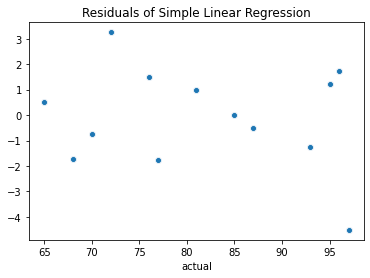

In [44]:
plot_residuals(y, yhat, data)
plt.title("Residuals of Simple Linear Regression")

In [45]:
y = predictions.actual
yhat = predictions.multiple_rfe - predictions.actual
data = predictions

def plot_residuals(y, yhat, data):
    return sns.scatterplot(y, yhat, data=data)

Text(0.5, 1.0, 'Residuals of Simple Linear Regression')

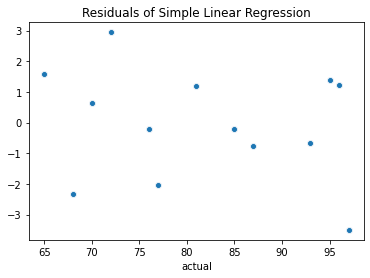

In [46]:
plot_residuals(y, yhat, data)
plt.title("Residuals of Simple Linear Regression")

### Visualize the actual vs the predicted values. Create a seperate visualization for each model.

In [60]:
X = train[['exam1']]
y = train.final_grade
lm = sklearn.linear_model.LinearRegression()
lm.fit(X, y)
predictions['simple_lm'] = lm.predict(X)



x_pred = np.array([60, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

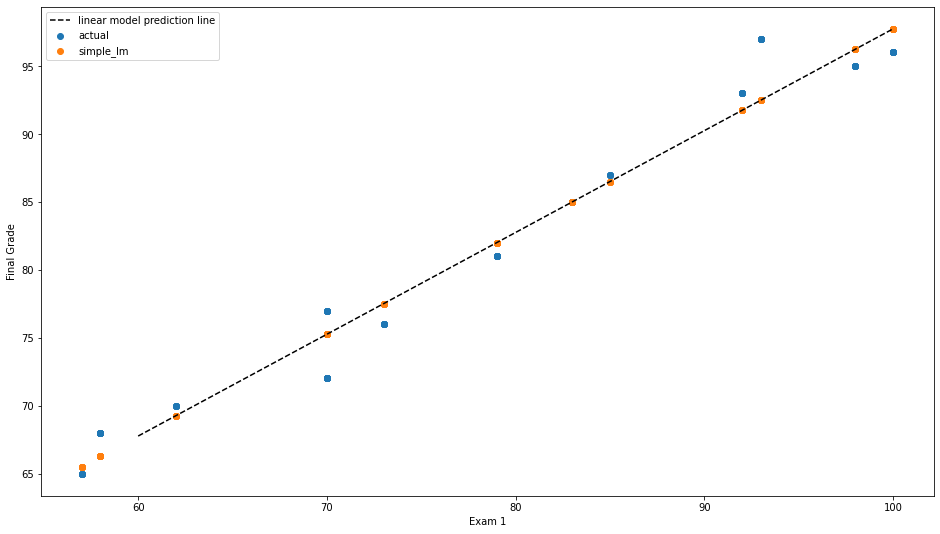

In [61]:
plt.figure(figsize=(16, 9))
plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, predictions.simple_lm, label='simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='black', label='linear model prediction line')

plt.xlabel('Exam 1')
plt.ylabel('Final Grade')
plt.legend()

In [74]:
import sklearn.feature_selection

X = train.drop(columns= 'final_grade')
y = train.final_grade

k = 2
lm = sklearn.linear_model.LinearRegression()

rfe = sklearn.feature_selection.RFE(lm, k)
rfe.fit(X, y)

X_rfe = rfe.transform(X)
lm.fit(X_rfe, y)

# x_pred = np.array([60, 100]).reshape(-1, 1)
# y_pred = lm.predict(x_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

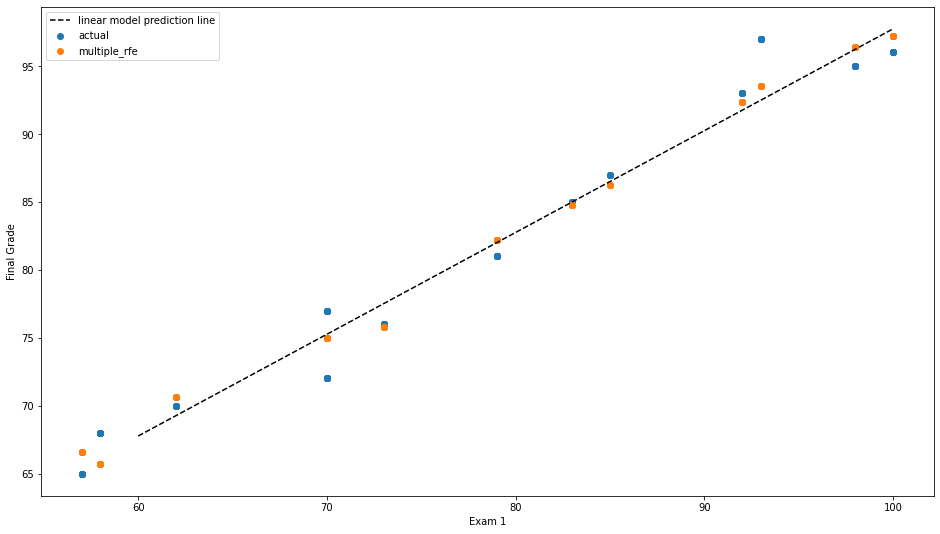

In [69]:
plt.figure(figsize=(16, 9))
plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, predictions.multiple_rfe, label='multiple_rfe')
plt.plot(x_pred, y_pred, ls='--', c='black', label='linear model prediction line')

plt.xlabel('Exam 1')
plt.ylabel('Final Grade')
plt.legend()

### Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

> No

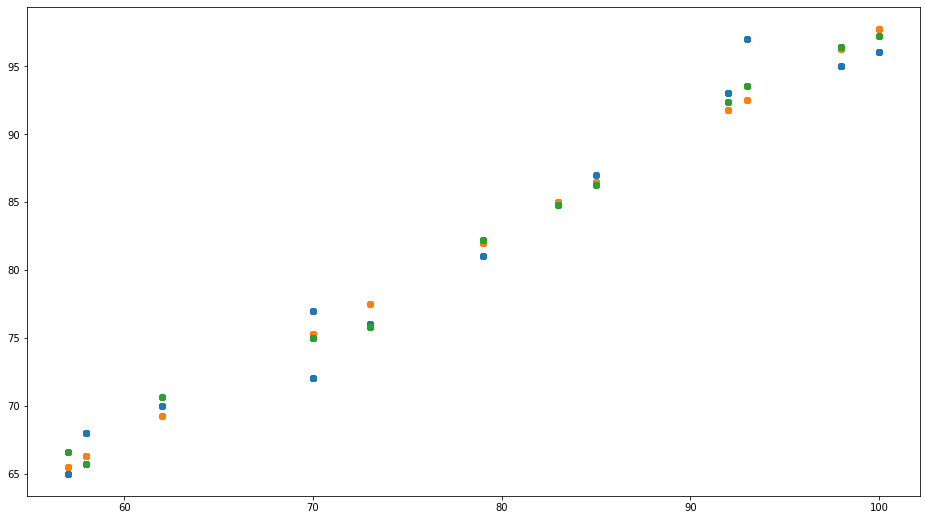

In [73]:
plt.figure(figsize=(16, 9))
plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, predictions.simple_lm, label='simple_lm')
plt.scatter(train.exam1, predictions.multiple_rfe, label='multiple_rfe')


### Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?
> same as multiple rfe

In [90]:
import sklearn.linear_model

X = train[['exam1', 'exam3']]

y = train.final_grade

lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions['two_simple'] = lm.predict(X)
mse = predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))
rmse = mse**.5
rmse

actual          0.000000
simple_lm       1.971615
multiple_rfe    1.811929
polynomial      1.962125
two_simple      1.811929
dtype: float64

### Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?
> It performs better on the test data.  Good predictor


In [82]:
X = train[['exam1']]
y = train.final_grade
lm = sklearn.linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
X_test = test[['exam1']]

test_predictions = lm.predict(X_test)
test_actual = test.final_grade

In [88]:
import math
mse = sklearn.metrics.mean_squared_error(test_actual, test_predictions)
rmse = math.sqrt(mse)
rmse

1.744350237353837

### As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of 5.00 per customer


### Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

In [126]:
from wrangle import wrangle_telco

In [127]:
telco = wrangle_telco()
telco.sample()

,customer_id,monthly_charges,tenure,total_charges
14,0078-XZMHT,85.15,72,6316.2


In [128]:
train_telco, test_telco = sklearn.model_selection.train_test_split(telco, train_size = .8, random_state=7)
train_telco.head(2)

,customer_id,monthly_charges,tenure,total_charges
1480,8747-UDCOI,19.35,65,1319.95
286,1779-PWPMG,114.65,72,8333.95


### Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

In [137]:
telco_predict = pd.DataFrame({'total_charges': train_telco.total_charges})

In [138]:
telco_predict['baseline'] = train_telco.total_charges.mean()

In [139]:
X = train_telco[['tenure']]
y = train_telco.total_charges

lm_tenure = sklearn.linear_model.LinearRegression()
lm_tenure.fit(X, y)

telco_predict['lm_tenure'] = lm_tenure.predict(X)

In [140]:
X = train_telco[['monthly_charges']]
y = train_telco.total_charges

lm_monthly = sklearn.linear_model.LinearRegression()
lm_monthly.fit(X, y)

telco_predict['lm_monthly'] = lm_monthly.predict(X)

In [141]:
X = train_telco[['tenure', 'monthly_charges']]
y = train_telco.total_charges

lm_both = sklearn.linear_model.LinearRegression()
lm_both.fit(X, y)

telco_predict['lm_both'] = lm_both.predict(X)

In [142]:
telco_predict.head()

,total_charges,baseline,lm_tenure,lm_monthly,lm_both
1480,1319.95,3708.784421,4410.012744,842.396170,1527.998628
286,8333.95,3708.784421,5045.936862,7470.981403,7638.458545
1523,4577.90,3708.784421,4773.397954,4149.733293,4598.608028
331,6827.50,3708.784421,5045.936862,6215.514840,6538.071609
1043,7880.25,3708.784421,5045.936862,7123.206732,7333.642219


### Evaluate the models and your baseline.

In [143]:
mse = telco_predict.apply(lambda col: sklearn.metrics.mean_squared_error(telco_predict.total_charges, col))
rmse = mse**.5
rmse

total_charges       0.000000
baseline         2548.566052
lm_tenure        1996.426816
lm_monthly        847.131950
lm_both           494.809190
dtype: float64

### Select the model that performed the best, and apply it to your test data.
> lm_both   

In [149]:
X_test = test_telco[['tenure', 'monthly_charges']]

test_predictions = lm_both.predict(X_test)
test_actual = test_telco.total_charges

In [151]:
mse = sklearn.metrics.mean_squared_error(test_predictions, test_actual)
rmse = mse**.5
rmse

496.66283127121676